In [805]:
import numpy as np
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt

In [858]:
ratings_df = pd.read_csv('ratings_matrix.csv')
ratings_df.head()

,User_id,"""Chosen"" Classics: Round the World in Eighty Days","""D"" is for Deadbeat","""Mildred Pierce","""Ra Force Rising"": Brother G","""Thirty years in hell""; or, ""From darkness to light",'Tis The Season: The Choice\First Fruits\A New Year; A New Beginning,'Tis the Season to Be Murdered,... Summer moonshine,...Arrow pointing nowhere,...,Zane's Gettin' Buck Wild: Sex Chronicles II,Zane's Skyscraper: A Novel,Zazie dans le Mtro,Zen Attitude,Zia,Zorba the Greek,green valley,never too much,our davie pepper,the Picture of Dorian Gray
0,A106016KSI0YQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A106E1N0ZQ4D9W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A10T0OW97SFBB,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A10Y3OZWENAQ6W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1129LM24YWSZV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [859]:
users = ratings_df['User_id']
ratings_df = ratings_df.drop('User_id',axis=1)
books = ratings_df.columns
print(users[0:10])
print(books[0:10])


0     A106016KSI0YQ
1    A106E1N0ZQ4D9W
2     A10T0OW97SFBB
3    A10Y3OZWENAQ6W
4    A1129LM24YWSZV
5    A114YQ7ZT9Y1W5
6    A116J8AUC3JSN2
7    A11B61QBGHLQDN
8    A11DCTGTPS7M0C
9    A11DN4ZLL2G5TG
Name: User_id, dtype: object
Index(['"Chosen" Classics: Round the World in Eighty Days',
       '"D" is for Deadbeat', '"Mildred Pierce',
       '"Ra Force Rising": Brother G',
       '"Thirty years in hell"; or, "From darkness to light',
       ''Tis The Season: The Choice\First Fruits\A New Year; A New Beginning',
       ''Tis the Season to Be Murdered', '... Summer moonshine',
       '...Arrow pointing nowhere', '1 Ragged Ridge Road'],
      dtype='object')


In [860]:
ratings_df.fillna(0, inplace=True)
#ratings_df[ratings_df < 3] = 0
ratings_df = ratings_df.astype(bool)
ratings_df.head()

,"""Chosen"" Classics: Round the World in Eighty Days","""D"" is for Deadbeat","""Mildred Pierce","""Ra Force Rising"": Brother G","""Thirty years in hell""; or, ""From darkness to light",'Tis The Season: The Choice\First Fruits\A New Year; A New Beginning,'Tis the Season to Be Murdered,... Summer moonshine,...Arrow pointing nowhere,1 Ragged Ridge Road,...,Zane's Gettin' Buck Wild: Sex Chronicles II,Zane's Skyscraper: A Novel,Zazie dans le Mtro,Zen Attitude,Zia,Zorba the Greek,green valley,never too much,our davie pepper,the Picture of Dorian Gray
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Apriori/Inference Rules Algorithm from Scratch

The apriori algorithm works by setting a minimum support threshhold and discarding any transaction sets which fall below this threshold. Checking all transaction sets would be copmutationally expensive. Instead, apriori checks the transaction of just one item at a time. If the single item transaction has sufficient support, then it is saved for later. We then move on to the next single element transaction. If it is sufficient, we save it for later. We then combine the single element transaction with all previously saved transaction subsets, keeping those new subsets which have sufficient support. The process is repeated for each possible item in our transactions. This allows us to find all useful transaction subsets while only passing over the data once.

After finding the transactions with sufficient support, we search for suitable asociation rules, keeping only those rules which surpass a confidence threshold. To create an association rule we simply partition one of the transaction sets found previously into antecedent and consequent sets. We then calculate the confidence for this rule to determine whether we should keep it or not.

#### Support
Support quantifies how often a transaction appears in the data. This helps us to focus on only those transaction for which finding an association rule will be consequential. Support is calculated as the probability of finding the transaction subset being part of one of the given transactions.
$$S(t) = P(t\subseteq T) = \frac{\lvert t \rvert}{\lvert T \rvert}$$

### Confidence
Confidence tells us what you would imagine, how confident we are that it is a good rule. Confidence is calculated as the conditional probability of the consequent happening given that the antecedent occured.
$$C(A \implies B) = P(B\vert A) = \frac{P(B\cap A)}{P(A)}$$

In [861]:
class apriori_rules:
    def __init__(self, support_threshold = 0.8):
        self.support_threshold = support_threshold
        self.confidence_threshold = None
        self.confidence_threshold = None
        self.transaction_subsets = None
        self.supported_t = None
        self.supported_values = None
        self.data = None
        self.itemsets = None
        self.rules = None


    def fit(self, X):
        
        '''Fits the transaction set. Search for transaction subset with sufficient support. 
        Save array/df of transactions and support as class attribute.
        X, our data, is the set of transactions. It should be in the form of rows of transactions.
        For each possible item in a transaction, there should be a column of binary values.'''

        X_array = X.to_numpy()
        self.data = X_array
        X_transpose = X_array.T
        #get number of transactions
        total_transactions = X_array.shape[0]
        #list of transactions which have sufficient support
        self.supported_t = []
        #list of support values for itemsets in supported_t
        self.support_values = []
        #dictionary to hold the chosen itemsets and their associted support values for easy access later
        self.itemsets = {}
        #holds indices of rows which hvae supported item sets
        supported_rows = []
        
        
        #Check each single element set, combine with prvious sets, save sufficent sets
        for index, col in enumerate(X_transpose):
            col_support = col.sum()/total_transactions
            #if not enough support for single element itemset, continue since no other itemset with that item will have enough support
            if col_support < self.support_threshold:
                continue

            #update our list of supported transactions
            copy_supported_t = self.supported_t.copy()
            for t in copy_supported_t:
                mask = X_array[:, tuple(t+[index])].all(axis=1)
                count = mask.sum()
                itemset_support = count/total_transactions
                if itemset_support > self.support_threshold:
                    self.supported_t.append(t + [index])
                    self.support_values.append((itemset_support))
                    self.itemsets[tuple(t + [index])] = itemset_support
             
            #add single element itemset
            self.supported_t.append([index])
            self.support_values.append((col_support))
            self.itemsets[tuple([index])] = col_support

        df_dict = {'itemsets': self.supported_t, 'support':self.support_values}
        self.transaction_subsets = pd.DataFrame(df_dict)

        return

    def find_rules(self, confidence_threshold=0.8):
        self.confidence_threshold = confidence_threshold
        #lists to hold rule information. Will be made into a DataFrame at the end
        antecedent_list = []
        consequent_list = []
        support_list = []
        confidence_list = []
        
        for itemset, support in self.itemsets.items():
            if len(itemset) == 1:
                continue
            #get all combinations of possible combinations of antecedent -> consequent pairs
            #get all possible antecedents of all possible lengths
            for k in range(1,len(itemset)):
                combs = list(combinations(itemset,k))
                for antecedent in combs:
                    #calculate confidence
                    confidence = support/self.itemsets[tuple(antecedent)]
                    if confidence >= confidence_threshold:
                        consequent = tuple(c for c in itemset if c not in antecedent) #find consequent
                        #save to rules dictionary
                        antecedent_list.append(antecedent)
                        consequent_list.append(consequent)
                        support_list.append(support)
                        confidence_list.append(confidence)
            
        #create rules dataframe
        df_dict = {'antecedents': antecedent_list, 'consequents':consequent_list, 'support':support_list,'confidence':confidence_list}
        self.rules = pd.DataFrame(df_dict)
          
        return

### "Training"
We choose a support threshold of 0.01 and a confidence threshold of 0.6. This was done in an attempt to balance several factors.<br>
We wanted to keep precision high while also generate enough recommendations<br>
With a higher confidence, the precision improves, but there are too few recommendations for users with few ratings<br>
With a lower support there will be more ratings, but this also creates more rules which leads to longer inference time and more data memorization.<br>
With a support = 0.01, we only consider item subsets which occur at least 0.01 * 1066 = 10.66 times (at least 11 times)

In [900]:
apriori_model = apriori_rules(support_threshold=0.01)
apriori_model.fit(ratings_df)
print(apriori_model.transaction_subsets)

apriori_model.find_rules(confidence_threshold = 0.6)
print(apriori_model.rules.head())

                 itemsets   support
0                     [0]  0.033771
1                     [1]  0.025328
2                     [2]  0.013133
3                     [5]  0.030019
4                     [7]  0.019700
...                   ...       ...
18153  [1014, 2102, 2134]  0.014071
18154        [2102, 2134]  0.015009
18155   [607, 2105, 2134]  0.014071
18156        [2105, 2134]  0.014071
18157              [2134]  0.061914

[18158 rows x 2 columns]
  antecedents consequents   support  confidence
0        (0,)      (115,)  0.032833    0.972222
1      (115,)        (0,)  0.032833    1.000000
2      (149,)      (150,)  0.025328    0.964286
3      (183,)      (275,)  0.016886    0.600000
4      (275,)      (183,)  0.016886    0.818182


In [909]:
print(apriori_model.transaction_subsets.shape)
print(apriori_model.rules.shape)

(18158, 2)
(72372, 4)


In [910]:
apriori_model.rules['confidence'].min()

np.float64(0.6)

#### Save the association rules as a dataframe
This can be accesed any time to make recommendations

In [911]:
apriori_model.rules.to_csv('/home/ldrich/Summer2025BHT/DS_Workflow_Applications/recommender_project/BHTRecommenderProject/mined_association_rules.csv')

### Check our algorithm agrees with the one in mlxtend package
It does. Yay!

In [912]:
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [913]:
frequent_itemsets = apriori(ratings_df, min_support=0.01, use_colnames=True)
print(frequent_itemsets.head())
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.6)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

    support                                           itemsets
0  0.033771  ("Chosen" Classics: Round the World in Eighty ...
1  0.025328                              ("D" is for Deadbeat)
2  0.013133                                  ("Mildred Pierce)
3  0.030019  ('Tis The Season: The Choice\First Fruits\A Ne...
4  0.019700                             (... Summer moonshine)
                                         antecedents  \
0  (Alice's adventures in wonderland: And Through...   
1  ("Chosen" Classics: Round the World in Eighty ...   
2  ("Chosen" Classics: Round the World in Eighty ...   
3  (Instigating Profligacy: Aviva and Aisha's Adv...   
4  ("Chosen" Classics: Round the World in Eighty ...   

                                         consequents   support  confidence  \
0  ("Chosen" Classics: Round the World in Eighty ...  0.032833    1.000000   
1  (Alice's adventures in wonderland: And Through...  0.032833    0.972222   
2  (Instigating Profligacy: Aviva and Aisha's Adv..

In [914]:
print(frequent_itemsets.shape)
print(rules.shape)

(18158, 2)
(72372, 14)


In [915]:
rules['confidence'].min()

np.float64(0.6)

### Evaluation
We evaluate Precision and Recall at top 10. We focus mostly on precision, hoping to generate as few non relevant items as possible.

In [865]:
def get_top_k_precision_recall(test_user_ratings, top_k = 10, mask_percentage = 0.4):

    item_precision = []
    item_recall = []
    
    for index, row in test_user_ratings.iterrows():
        user_items = np.argwhere(row).flatten()
        rng = np.random.default_rng(seed=1992) #set random state
        #create visible items to make the predicitons with; masked items to test precision/recall
        masked_items = rng.choice(user_items, int(mask_percentage * len(user_items)))
        visible_items = [int(item) for item in user_items if item not in masked_items]
    
        #get top_k recommendations
        mask = apriori_model.rules['antecedents'].apply(lambda a: set(a).issubset(visible_items)) #indices of antecedents that apply
        recs = apriori_model.rules.loc[mask, ['consequents', 'confidence']] #get matching consequents as recommendations
        recs = recs.sort_values(by='confidence', ascending=False)#sort by confidence
        recs = recs[~recs['consequents'].duplicated()]#make recommendations unique
        recs = recs.iloc[0:top_k, 0].to_list() #get top_k recommendations
        recs = list(item for tpl in recs for item in tpl)
        recs = recs[0:top_k] #redo since some consequents have more than 1 item.
    
        #calculate precision and recall
        true_positives = len(set(recs) & set(masked_items))
        precision = true_positives/len(recs) if len(recs) > 0 else 0
        recall = true_positives/len(masked_items)
    
        #append to lists
        item_precision.append(precision)
        item_recall.append(recall)
    
    #calculate average top_k precision and recall
    mean_precision = np.mean(item_precision)
    mean_recall = np.mean(item_recall)
    
    return mean_precision, mean_recall

In [967]:
#calculate precision recall for user 2
user_ratings = ratings_df.iloc[[2]]
precision, recall = get_top_k_precision_recall(user_ratings)
print(f'Precision: {precision}')
print(f'Recall: {recall:.3f}')

Precision: 0.3
Recall: 0.214


In [968]:
#calculate average top-10 precision and recall for random sample of users
top_k = 10
mask_percentage = 0.4

#collect data
precision_list = []
recall_list = []

#get random sample of users with different amount of ratings
#users with less than 30 ratings
test_user_ratings = ratings_df[((ratings_df == 1).sum(axis=1) < 30)].sample(n=50, random_state=1992)
precision, recall = get_top_k_precision_recall(test_user_ratings, top_k=top_k, mask_percentage=mask_percentage)
precision_list.append(precision), recall_list.append(recall)

test_user_ratings = ratings_df[((ratings_df == 1).sum(axis=1) >= 30) & ((ratings_df == 1).sum(axis=1) < 100)].sample(n=50,random_state=1992)
precision, recall = get_top_k_precision_recall(test_user_ratings, top_k=top_k, mask_percentage=mask_percentage)
precision_list.append(precision), recall_list.append(recall)

test_user_ratings = ratings_df[((ratings_df == 1).sum(axis=1) >= 100) & ((ratings_df == 1).sum(axis=1) < 200)].sample(n=50,random_state=1992)
precision, recall = get_top_k_precision_recall(test_user_ratings, top_k=top_k, mask_percentage=mask_percentage)
precision_list.append(precision), recall_list.append(recall)

test_user_ratings = ratings_df[((ratings_df == 1).sum(axis=1) >= 200)]
precision, recall = get_top_k_precision_recall(test_user_ratings, top_k=top_k, mask_percentage=mask_percentage)
precision_list.append(precision), recall_list.append(recall)


(None, None)

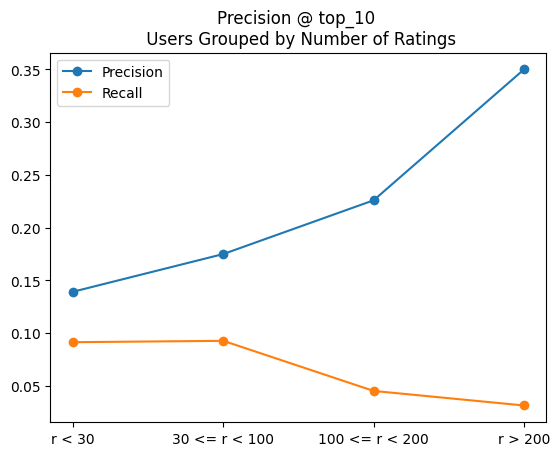

In [969]:
labels = ["r < 30","30 <= r < 100", "100 <= r < 200", "r > 200"]
plt.plot(labels, precision_list, '-o', label='Precision')
plt.plot(labels, recall_list, '-o', label='Recall')
plt.title("Precision @ top_10 \n Users Grouped by Number of Ratings")
plt.legend()

### Make Recommendations based on random user's rating vector

In [970]:
def get_all_recs(user_ratings, extra_recs=False):
    rated_items = np.argwhere(user_ratings).flatten() #column indeices of books that have been rated
    mask = apriori_model.rules['antecedents'].apply(lambda a: set(a).issubset(rated_items)) #indices of antecedents that apply
    recs = apriori_model.rules.loc[mask, 'consequents'] #get matching consequents as recommendations
    recs = list(set(item for tpl in recs for item in tpl)) #make the recommendations unique
    recs = [rec for rec in recs if rec not in rated_items]#remove recommendations matching items already in user list
    book_recs = ratings_df.columns[recs]#map recs indices back to original book names
    
    
    if extra_recs:
        #get more book recommendations based on the ones already found
        #!!!Doesn't work well, usually just get same books back; always get "Sense and Sensibility".
        mask = apriori_model.rules['antecedents'].apply(lambda a: set(a).issubset(recs)) #indices of antecedents that apply
        recs = apriori_model.rules.loc[mask, 'consequents'] #get matching consequents as recommendations
        recs = list(set(item for tpl in recs for item in tpl)) #make the recommendations unique
        recs = [rec for rec in recs if rec not in rated_items]#remove recommendations matching items already in user list
        more_book_recs = ratings_df.columns[recs]#map recs indices back to original book names
        #get rid of duplicates
        book_recs = book_recs.union(more_book_recs)
        
    
    return book_recs

In [971]:
user_ratings = np.zeros(ratings_df.shape[1])
rand_items = np.random.randint(ratings_df.shape[1], size=30)
user_ratings[rand_items] = 1 #random user vector
get_all_recs(user_ratings, extra_recs=True)

Index(['A History of the English-Speaking Peoples', 'At a winter's fire',
       'Blind Man with a Pistol', 'Bringers of Death',
       'Crossroads of Twilight', 'Franny, the Queen of Provincetown',
       'La mujer del viajero en el tiempo / The Time Traveler's Wife',
       'Lord Of Chaos)',
       'The Dragon Reborn: Book Three of 'The Wheel of Time'',
       'The Heaven Of Mercury', 'Whose body?: A Lord Peter Wimsey novel'],
      dtype='object')

### Make Recommendations for user 2

In [972]:
#inspect user 2's list of rated items
user_ratings = ratings_df.iloc[2]
rated_items = np.argwhere(user_ratings).flatten() #column indeices of books that have been rated
user_books = ratings_df.columns[rated_items]
print(user_books)

Index(['"Chosen" Classics: Round the World in Eighty Days',
       'AT THE FOOT OF THE RAINBOW',
       'Alice's adventures in wonderland: And Through the looking-glass, and what Alice found there,',
       'Brave New World', 'Cape Breton Road: A Novel',
       'Captain from Castile & Prince of Foxes',
       'CliffsComplete The Scarlet Letter', 'Fair Exchange Is Robbery',
       'For Those Who Fell', 'I have no mouth,: And I must scream;',
       'Instigating Profligacy: Aviva and Aisha's Adventures in the World',
       'Japan Eow2', 'Just Sex', 'Kim',
       'LEWIS CARROLL (ALICE'S ADVENTURES IN WONDERLAND, THROUGH THE LOOKING GLASS, THE HUNTING OF THE SNARK',
       'Lion, the Witch, and the Wardrobe', 'Lord of Flemen',
       'Man Who Was Thursday a Nightmare', 'Memories of the Future; [Novel]',
       'Miranda & the Cat', 'New Orleans Beat', 'Plague at Redhook',
       'Pride and Prejudice',
       'THE PETAYBEE SEQUENCE: Book One: Powers that Be; Book Two: Power Lines; Book Thre

In [973]:
#try user from our training set
recs = get_all_recs(user_ratings, extra_recs=True)
print(recs)

Index(['A Farewell to Arms', 'Emma', 'George Orwell', 'Mansfield Park',
       'Not Exactly Pregnant / Darn Near Perfect', 'Permutation City',
       'Reunion at University Avenue', 'Sentido y sensibilidad',
       'The Diablo Grant', 'The Snow Child: A Russian Folktale',
       'The great Gatsby', 'The sun eaters', 'U-859',
       'World of Darkness: Mafia'],
      dtype='object')


#### Get the top books
Items with the highest support

In [1009]:
top_k = 30
#indices of supported items in descending order
top_indices = np.argsort(-np.array(apriori_model.support_values))[0:top_k]
#get the items
top_books = [apriori_model.supported_t[i] for i in top_indices]
top_books = [item for sublist in top_books for item in sublist]
ratings_df.columns[top_books]

Index(['CHEF WHO DIED SAUTEING', 'The Diablo Grant', 'The great Gatsby',
       'The Diablo Grant', 'The great Gatsby',
       'The Girl at the Lion d'Or: Complete & Unabridged',
       'To kill a mockingbird', 'Cape Breton Road: A Novel', 'U-859',
       'The sun eaters', 'George Orwell', 'George Orwell', 'U-859',
       'Propeller Island',
       'The Hobbitt, or there and back again; illustrated by the author.',
       'Round the Bend', 'Lincoln & other poems', 'Memoirs of a Geisha',
       'Pride and Prejudice', 'A Key for the Nonesuch:',
       'World of Darkness: Mafia',
       'Slaughterhouse-five: Or, The children's crusade : a duty-dance with death',
       'Slaughter-House Five',
       'Slaughterhouse-five: Or, The children's crusade : a duty-dance with death',
       'Slaughter-House Five', 'The poisonwood Bible : a novel',
       'New Orleans Beat', 'What Love Means to You People',
       'Worlds of the imperium', 'Reconstructionist, The', 'Brave New World',
       'The La

Index(['"Chosen" Classics: Round the World in Eighty Days',
       '"D" is for Deadbeat', '"Mildred Pierce',
       '"Ra Force Rising": Brother G',
       '"Thirty years in hell"; or, "From darkness to light',
       ''Tis The Season: The Choice\First Fruits\A New Year; A New Beginning',
       ''Tis the Season to Be Murdered', '... Summer moonshine',
       '...Arrow pointing nowhere', '1 Ragged Ridge Road',
       ...
       'Zane's Gettin' Buck Wild: Sex Chronicles II',
       'Zane's Skyscraper: A Novel', 'Zazie dans le Mtro', 'Zen Attitude',
       'Zia', 'Zorba the Greek', 'green valley', 'never too much',
       'our davie pepper', 'the Picture of Dorian Gray'],
      dtype='object', length=2135)